In [1]:
import qsharp
import numpy as np

In [2]:
%%qsharp

open Microsoft.Quantum.Intrinsic;
open Microsoft.Quantum.Canon;
open Microsoft.Quantum.Diagnostics;
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Math;


operation function_0(qubitSet : Qubit[], qubit2 : Qubit) : Unit{
    
}

operation function_1(qubitSet : Qubit[], qubit2 : Qubit) : Unit{
    X(qubit2);
}

operation function_2(qubitSet : Qubit[], qubit2 : Qubit) : Unit{
    for qubit in qubitSet{
        CNOT(qubit,qubit2);
    }
    
}

operation function_3(qubitSet : Qubit[], qubit2 : Qubit) : Unit{
    for qubit in qubitSet{
        CNOT(qubit,qubit2);
    }
    X(qubit2);
}
    
operation DeutschJozsaAlgorithmImplmentation(n : Int, oracle : ((Qubit[], Qubit) => Unit)) : Bool{
    mutable isConstant = true;
    
    use qSet1 = Qubit[n];
    use q2 = Qubit();
    
    X(q2);
    ApplyToEachA(H, qSet1);
    H(q2);
    
    Message($"The first DumpMachine yields : ");
    DumpMachine();
    
    oracle(qSet1,q2);
    
    Message($"The second DumpMachine yields : ");
    DumpMachine();
    
    ApplyToEachA(H, qSet1);
    
    Message($"The third DumpMachine yields : ");
    DumpMachine();
    
    if(MeasureAllZ(qSet1) != Zero){
        set isConstant = false;
    }
    
    ResetAll(qSet1);
    Reset(q2);
    
    Message($"The fourth DumpMachine yields : ");
    DumpMachine();
    
    return isConstant;
} 

operation MainFunction() : Unit{
    
    Message($"The function is: {DeutschJozsaAlgorithmImplmentation(1,function_2) ? "constant" | "balanced"}.");
}

In [3]:
MainFunction.simulate()

The first DumpMachine yields : 


|0⟩	0.5000000000000001 + 0𝑖
|1⟩	0.5000000000000001 + 0𝑖
|2⟩	-0.5000000000000001 + 0𝑖
|3⟩	-0.5000000000000001 + 0𝑖

The second DumpMachine yields : 


|0⟩	0.5000000000000001 + 0𝑖
|1⟩	-0.5000000000000001 + 0𝑖
|2⟩	-0.5000000000000001 + 0𝑖
|3⟩	0.5000000000000001 + 0𝑖

The third DumpMachine yields : 


|0⟩	-2.299347170293093E-17 + 0𝑖
|1⟩	0.7071067811865477 + 0𝑖
|2⟩	2.299347170293093E-17 + 0𝑖
|3⟩	-0.7071067811865477 + 0𝑖

The fourth DumpMachine yields : 


|0⟩	-1 + 0𝑖
|1⟩	0 + 0𝑖
|2⟩	0 + 0𝑖
|3⟩	0 + 0𝑖

The function is: balanced.


()

In [4]:
with qsharp.capture_diagnostics() as diagnostics:
    MainFunction.simulate()
print(diagnostics)

The first DumpMachine yields : 
The second DumpMachine yields : 
The third DumpMachine yields : 
The fourth DumpMachine yields : 
The function is: balanced.
[{'diagnostic_kind': 'state-vector', 'qubit_ids': [0, 1], 'n_qubits': 2, 'amplitudes': {'0': {'Real': 0.5000000000000001, 'Imaginary': 0.0, 'Magnitude': 0.5000000000000001, 'Phase': 0.0}, '1': {'Real': 0.5000000000000001, 'Imaginary': 0.0, 'Magnitude': 0.5000000000000001, 'Phase': 0.0}, '2': {'Real': -0.5000000000000001, 'Imaginary': 0.0, 'Magnitude': 0.5000000000000001, 'Phase': 3.141592653589793}, '3': {'Real': -0.5000000000000001, 'Imaginary': 0.0, 'Magnitude': 0.5000000000000001, 'Phase': 3.141592653589793}}}, {'diagnostic_kind': 'state-vector', 'qubit_ids': [0, 1], 'n_qubits': 2, 'amplitudes': {'0': {'Real': 0.5000000000000001, 'Imaginary': 0.0, 'Magnitude': 0.5000000000000001, 'Phase': 0.0}, '1': {'Real': -0.5000000000000001, 'Imaginary': 0.0, 'Magnitude': 0.5000000000000001, 'Phase': 3.141592653589793}, '2': {'Real': -0.5000

In [5]:
firstAmplitudes = []
value1 = diagnostics[0]['amplitudes']['0']['Real']
firstAmplitudes.append(value1)

value2 = diagnostics[0]['amplitudes']['1']['Real']
firstAmplitudes.append(value2)

value3 = diagnostics[0]['amplitudes']['2']['Real']
firstAmplitudes.append(value3)

value4 = diagnostics[0]['amplitudes']['3']['Real']
firstAmplitudes.append(value4)

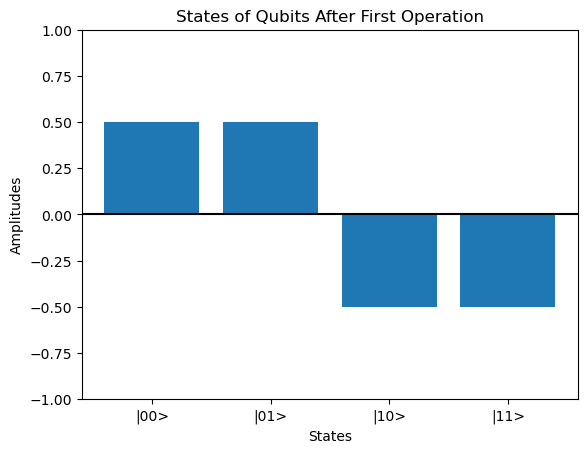

In [6]:
import matplotlib.pyplot as plt

states = ['|00>', '|01>', '|10>', '|11>']

figure_FirstDumpMachine = plt.figure()
plt.axhline(y=0, color='k', linestyle='-')
plt.bar(states, firstAmplitudes)
plt.ylim([-1, 1])
plt.xlabel('States')
plt.ylabel('Amplitudes')
plt.title('States of Qubits After First Operation')
plt.show()

In [7]:
secondAmplitudes = []
value5 = diagnostics[1]['amplitudes']['0']['Real']
secondAmplitudes.append(value5)

value6 = diagnostics[1]['amplitudes']['1']['Real']
secondAmplitudes.append(value6)

value7 = diagnostics[1]['amplitudes']['2']['Real']
secondAmplitudes.append(value7)

value8 = diagnostics[1]['amplitudes']['3']['Real']
secondAmplitudes.append(value8)

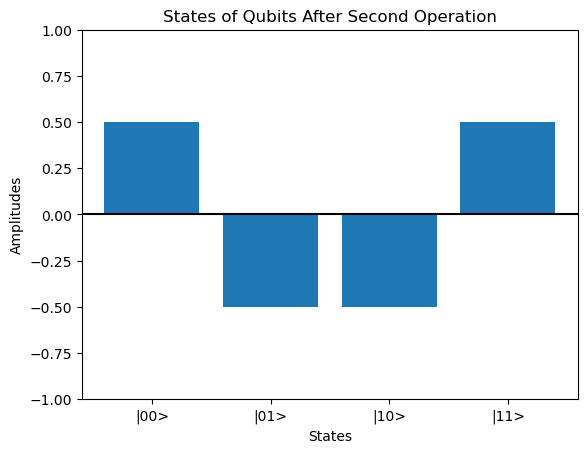

In [8]:
figure_SecondDumpMachine = plt.figure()
plt.axhline(y=0, color='k', linestyle='-')
plt.bar(states, secondAmplitudes)
plt.ylim([-1, 1])
plt.xlabel('States')
plt.ylabel('Amplitudes')
plt.title('States of Qubits After Second Operation')
plt.show()

In [9]:
thirdAmplitudes = []
value9 = diagnostics[2]['amplitudes']['0']['Real']
thirdAmplitudes.append(value9)

value10 = diagnostics[2]['amplitudes']['1']['Real']
thirdAmplitudes.append(value10)

value11 = diagnostics[2]['amplitudes']['2']['Real']
thirdAmplitudes.append(value11)

value12 = diagnostics[2]['amplitudes']['3']['Real']
thirdAmplitudes.append(value12)

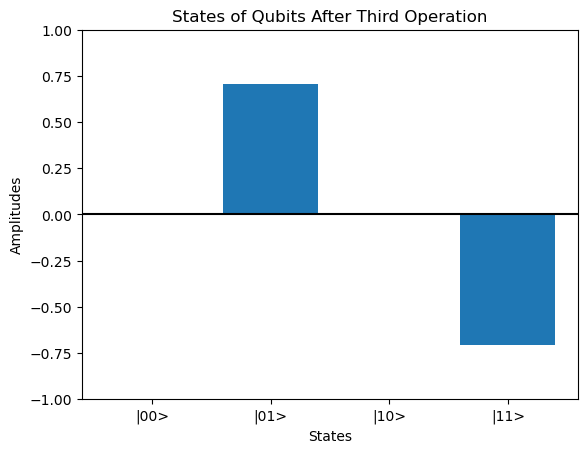

In [10]:
figure_ThirdDumpMachine = plt.figure()
plt.axhline(y=0, color='k', linestyle='-')
plt.bar(states, thirdAmplitudes)
plt.ylim([-1, 1])
plt.xlabel('States')
plt.ylabel('Amplitudes')
plt.title('States of Qubits After Third Operation')
plt.show()

In [11]:
fourthAmplitudes = []
value13 = diagnostics[3]['amplitudes']['0']['Real']
fourthAmplitudes.append(value13)

value14 = diagnostics[3]['amplitudes']['1']['Real']
fourthAmplitudes.append(value14)

value15 = diagnostics[3]['amplitudes']['2']['Real']
fourthAmplitudes.append(value15)

value16 = diagnostics[3]['amplitudes']['3']['Real']
fourthAmplitudes.append(value16)

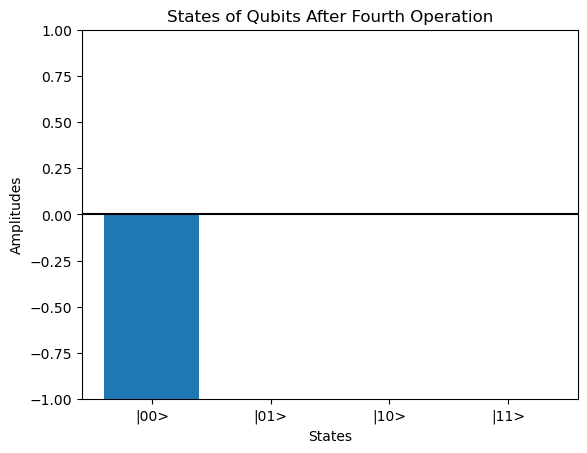

In [12]:
figure_FourthDumpMachine = plt.figure()
plt.axhline(y=0, color='k', linestyle='-')
plt.bar(states, fourthAmplitudes)
plt.ylim([-1, 1])
plt.xlabel('States')
plt.ylabel('Amplitudes')
plt.title('States of Qubits After Fourth Operation')
plt.show()